# Meta analysis

In [1]:
# Install Black autoformatter with: pip install nb-black
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Build meta analysis datasets

## Create `bmi ~ age + logk_money` dataset

In [ ]:
vv = pd.read_csv("../veillard_vincent_2020_reanalysis/veillard_vincent_2020_data.csv")

# rename columns to be consistent with Study 1 and Study 2
vv.rename({"bmi": "BMI", "logk_money": "logk_mcq"}, axis="columns", inplace=True)
# select the columns we really want
vv = vv[["age", "sex", "BMI", "logk_mcq"]]

# truncate outside bounds of sensitivity
truncate = (vv.logk_mcq < -8.5) | (vv.logk_mcq > -1.5)
vv.logk_mcq[truncate] = np.nan

# drop participants with missing logk_mcq values
vv = vv[vv["logk_mcq"].notna()]
# drop participants with missing BMI values
vv = vv[vv["BMI"].notna()]

In [ ]:
study1 = pd.read_csv("../data/04 final data/study1_final_data.csv")
study1.head()

# select the columns we really want
study1 = study1[["age", "sex", "BMI", "logk_mcq"]]
# drop participants with missing logk_mcq values
study1 = study1[study1["logk_mcq"].notna()]
# drop participants with missing BMI values
study1 = study1[study1["BMI"].notna()]

In [ ]:
# concatenate datasets
final = pd.concat([vv, study1], ignore_index=True)
final

In [ ]:
final.to_csv("meta_analysis_logk_mcq.csv", index=False)

## Create `bmi ~ age + logk_food` dataset

In [ ]:
study1 = pd.read_csv("../data/04 final data/study1_final_data.csv")
study1.head()

# select the columns we really want
study1 = study1[["age", "sex", "BMI", "logk_fcq"]]

# truncate
# DO TRUNCATION HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# drop participants with missing logk_mcq values
study1 = study1[study1["logk_fcq"].notna()]
# drop participants with missing BMI values
study1 = study1[study1["BMI"].notna()]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.hist(study1.logk_fcq.values, 50)
ax.set(xlabel="MCQ")

In [ ]:
study2 = pd.read_csv("../data/04 final data/study2_final_data.csv")
study2.head()

# select the columns we really want
study2 = study2[["age", "sex", "BMI", "logk_fcq"]]
# drop participants with missing logk_mcq values
study2 = study2[study2["logk_fcq"].notna()]
# drop participants with missing BMI values
study2 = study2[study2["BMI"].notna()]

In [ ]:
# concatenate datasets
final = pd.concat([study1, study2], ignore_index=True)
final

In [ ]:
final.to_csv("meta_analysis_logk_fcq.csv", index=False)

## Create `bmi ~ age + logk_weight` dataset

In [4]:
vv = pd.read_csv("../veillard_vincent_2020_reanalysis/veillard_vincent_2020_data.csv")

# rename columns to be consistent with Study 1 and Study 2
vv.rename({"bmi": "BMI", "logk_weight": "logk_wcq"}, axis="columns", inplace=True)
# select the columns we really want
vv = vv[["age", "sex", "BMI", "logk_wcq"]]

(array([15.,  1.,  1.,  2.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  4.,  0.,
         1.,  1.,  5., 13.,  3.,  2.,  6., 13., 10., 12., 16., 14., 12.,
        15., 17.,  9., 10.,  6., 19.,  4.,  8.,  4.,  5.,  9.,  1.,  3.,
         0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.]),
 array([-7.71294769, -7.57316231, -7.43337693, -7.29359154, -7.15380616,
        -7.01402078, -6.8742354 , -6.73445002, -6.59466464, -6.45487925,
        -6.31509387, -6.17530849, -6.03552311, -5.89573773, -5.75595235,
        -5.61616696, -5.47638158, -5.3365962 , -5.19681082, -5.05702544,
        -4.91724006, -4.77745467, -4.63766929, -4.49788391, -4.35809853,
        -4.21831315, -4.07852777, -3.93874239, -3.798957  , -3.65917162,
        -3.51938624, -3.37960086, -3.23981548, -3.1000301 , -2.96024471,
        -2.82045933, -2.68067395, -2.54088857, -2.40110319, -2.26131781,
        -2.12153242, -1.98174704, -1.84196166, -1.70217628, -1.5623909 ,
        -1.42260552, -1.28282013, -1.14303475, -1.00324937,

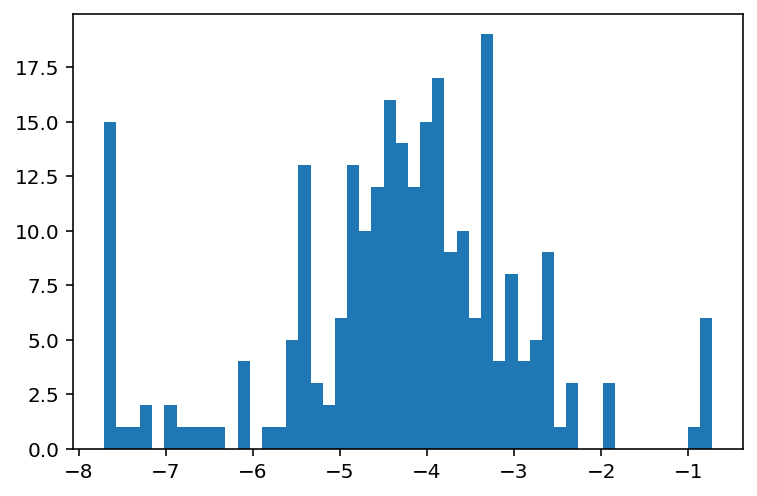

In [6]:
plt.hist(vv.logk_wcq, 50)

In [7]:
vv = pd.read_csv("../veillard_vincent_2020_reanalysis/veillard_vincent_2020_data.csv")

# rename columns to be consistent with Study 1 and Study 2
vv.rename({"bmi": "BMI", "logk_weight": "logk_wcq"}, axis="columns", inplace=True)
# select the columns we really want
vv = vv[["age", "sex", "BMI", "logk_wcq"]]

# truncate
truncate = (vv.logk_wcq < -7) | (vv.logk_wcq > -1.5)
vv.logk_wcq[truncate] = np.nan

# drop participants with missing logk_wcq values
vv = vv[vv["logk_wcq"].notna()]
# drop participants with missing BMI values
vv = vv[vv["BMI"].notna()]

(array([ 2.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  3.,  1.,  0.,  1.,  0.,
         2.,  4., 13.,  1.,  2.,  4.,  4.,  4., 11.,  9., 10.,  9.,  8.,
        14., 10.,  9., 17.,  8.,  9.,  4.,  7.,  4., 12.,  8.,  4.,  8.,
         1.,  3.,  6.,  8.,  0.,  2.,  2.,  0.,  0.,  2.,  1.]),
 array([-6.99748955, -6.89457412, -6.79165868, -6.68874324, -6.58582781,
        -6.48291237, -6.37999694, -6.2770815 , -6.17416606, -6.07125063,
        -5.96833519, -5.86541976, -5.76250432, -5.65958888, -5.55667345,
        -5.45375801, -5.35084257, -5.24792714, -5.1450117 , -5.04209627,
        -4.93918083, -4.83626539, -4.73334996, -4.63043452, -4.52751909,
        -4.42460365, -4.32168821, -4.21877278, -4.11585734, -4.01294191,
        -3.91002647, -3.80711103, -3.7041956 , -3.60128016, -3.49836473,
        -3.39544929, -3.29253385, -3.18961842, -3.08670298, -2.98378755,
        -2.88087211, -2.77795667, -2.67504124, -2.5721258 , -2.46921037,
        -2.36629493, -2.26337949, -2.16046406, -2.05754862,

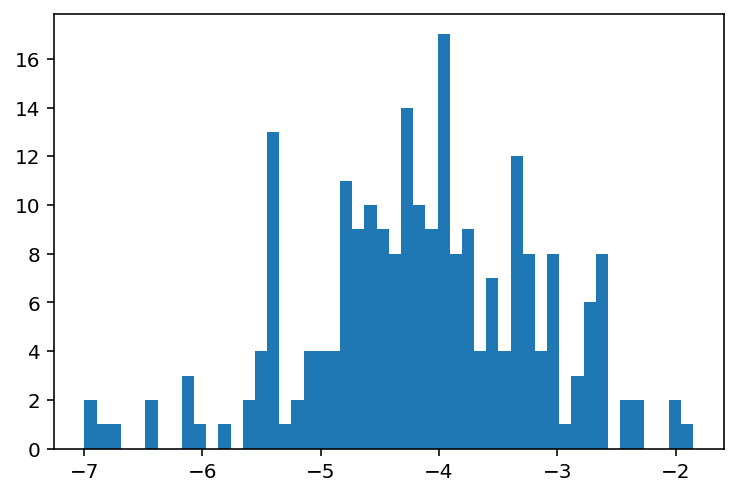

In [8]:
plt.hist(vv.logk_wcq, 50)

In [11]:
vv

,age,sex,BMI,logk_wcq
0,24,male,14.06,-2.754500
1,20,female,16.19,-2.760381
3,20,female,16.65,-5.402992
4,20,female,17.57,-5.130899
5,19,female,17.63,-3.936232
...,...,...,...,...
252,37,female,50.67,-3.648771
253,51,female,50.79,-3.404230
254,21,female,52.80,-4.607212
255,36,female,56.68,-4.749219


In [12]:
study2 = pd.read_csv("../data/04 final data/study2_final_data.csv")
study2.head()

# select the columns we really want
study2 = study2[["age", "sex", "BMI", "logk_wcq"]]
# drop participants with missing logk_mcq values
study2 = study2[study2["logk_wcq"].notna()]
# drop participants with missing BMI values
study2 = study2[study2["BMI"].notna()]

In [13]:
# concatenate datasets
final = pd.concat([vv, study2], ignore_index=True)
final

,age,sex,BMI,logk_wcq
0,24,male,14.060,-2.754500
1,20,female,16.190,-2.760381
2,20,female,16.650,-5.402992
3,20,female,17.570,-5.130899
4,19,female,17.630,-3.936232
...,...,...,...,...
472,27,female,21.094,-4.104936
473,18,female,19.133,-4.853330
474,23,female,23.052,-1.888877
475,24,female,33.673,-2.695028


In [ ]:
final.to_csv("meta_analysis_logk_wcq.csv", index=False)